Drug Discovery Model for Alzheimers (Exploratory Data Analysis)

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-26 10:37:54--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   299MB/s    in 0.3s    

2023-02-26 10:37:54 (299 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

Import and read the CSV file.

In [2]:
import pandas as pd

In [74]:
df = pd.read_csv('AB_A4_raw.csv').dropna()
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1069,CHEMBL4226641,CN(C)Cc1ccccc1-c1cc(C(=O)NCCN2CCCCC2)cc(C(=O)N...,10000.0,intermediate
1070,CHEMBL4227708,c1ccc(-c2cc(CNCCN3CCCCC3)cc(CNCCN3CCCCC3)c2)c(...,10000.0,intermediate
1071,CHEMBL4227244,c1ccc(-c2cc(CNCCN3CCCCC3)cc(CNCCN3CCCCC3)c2)c(...,10000.0,intermediate
1072,CHEMBL4226530,CN1CCN(Cc2ccccc2-c2cc(CNCCN3CCCCC3)cc(CNCCN3CC...,10000.0,intermediate


Transfer the smiles column on the last part of the table.

In [78]:
#Making a variable without the smiles column named df_no_smile.
df_no_smiles = df.drop(columns='canonical_smiles')

#creating a smiles list type variable to concatenate to df_no_smiles variable later.
smiles = []
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles').dropna()


In [79]:
#adding the smiles to the last column of the table.
df_smiles =  pd.concat([df_no_smiles,smiles], axis=1).dropna()
df_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL311039,5000.0,intermediate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
836,CHEMBL3692696,800.0,inactive,CN(C)Cc1ccccc1-c1cc(C(=O)NCCN2CCCCC2)cc(C(=O)N...
837,CHEMBL3692697,630000.0,inactive,c1ccc(-c2cc(CNCCN3CCCCC3)cc(CNCCN3CCCCC3)c2)c(...
838,CHEMBL3692698,20000.0,inactive,c1ccc(-c2cc(CNCCN3CCCCC3)cc(CNCCN3CCCCC3)c2)c(...
839,CHEMBL3692699,84000.0,inactive,CN1CCN(Cc2ccccc2-c2cc(CNCCN3CCCCC3)cc(CNCCN3CC...


Calculating Lipinsky Descriptor

[Click Here for information](https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five)





**Importing libraries**

In [68]:

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [69]:
#creating a Lipinsky function based on Data Professors code

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     

In [80]:
#Creating a variable called df_lipinsky and running the lipinsky function 

df_lipinski = lipinski(df_smiles.canonical_smiles).dropna()
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.3188,1.0,2.0
1,299.461,3.2412,1.0,3.0
2,311.422,3.3188,1.0,2.0
3,327.877,3.8331,1.0,2.0
4,372.328,3.9422,1.0,2.0
...,...,...,...,...
648,519.734,3.8466,2.0,5.0
649,531.833,5.4905,2.0,5.0
650,533.805,4.3368,2.0,6.0
651,546.848,4.2520,2.0,6.0


In [82]:
#Combine df and df_lipinsky
df_combined = pd.concat([df,df_lipinski], axis=1).dropna()
df_combined


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.3188,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.2412,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.3188,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.8331,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.9422,1.0,2.0
...,...,...,...,...,...,...,...,...
648,CHEMBL3814123,Nc1nc(NCCc2ccccc2)c2ccccc2n1,25000.0,active,519.734,3.8466,2.0,5.0
649,CHEMBL3357256,Nc1nc(NCc2ccc(F)cc2)c2ccccc2n1,25000.0,inactive,531.833,5.4905,2.0,5.0
650,CHEMBL3814748,Nc1nc(NCc2cccc(F)c2)c2ccccc2n1,25000.0,inactive,533.805,4.3368,2.0,6.0
651,CHEMBL3814631,Nc1nc(NCc2ccc(Br)cc2)c2ccccc2n1,14800.0,inactive,546.848,4.2520,2.0,6.0


**Convert IC50 to pIC50**

To allow IC50 data to be more uniformly distributed,the  IC50 will be converted to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:



*   Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
*   Take the molar value and apply -log10
* Delete the standard_value column and create a new pIC50 column



```
# This is based on the description by Data Professor
```








In [83]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x
     

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [84]:
df_combined.standard_value.describe()

count       519.000000
mean      21300.500906
std       52524.869049
min          -1.000000
25%         120.000000
50%        3000.000000
75%       17150.000000
max      500000.000000
Name: standard_value, dtype: float64

In [40]:
-np.log10( (10**-9)* 10000000000 )


-1.0

In [85]:
#Normalize the values
def norm_value(input):
    norm = [min(i, 100000000) for i in input['standard_value']]

    input['standard_value_norm'] = [min(i, 100000000) for i in input['standard_value']]
    input.drop('standard_value', axis=1, inplace=True)
        
    return input
     

In [86]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
648,CHEMBL3814123,Nc1nc(NCCc2ccccc2)c2ccccc2n1,active,519.734,3.8466,2.0,5.0,25000.0
649,CHEMBL3357256,Nc1nc(NCc2ccc(F)cc2)c2ccccc2n1,inactive,531.833,5.4905,2.0,5.0,25000.0
650,CHEMBL3814748,Nc1nc(NCc2cccc(F)c2)c2ccccc2n1,inactive,533.805,4.3368,2.0,6.0,25000.0
651,CHEMBL3814631,Nc1nc(NCc2ccc(Br)cc2)c2ccccc2n1,inactive,546.848,4.2520,2.0,6.0,14800.0


In [87]:
df_norm.standard_value_norm.describe()

count       519.000000
mean      21300.500906
std       52524.869049
min          -1.000000
25%         120.000000
50%        3000.000000
75%       17150.000000
max      500000.000000
Name: standard_value_norm, dtype: float64

In [89]:
#Finalize the data
df_final = pIC50(df_norm)
df_final

<ipython-input-83-0b63cc8c2686>:10: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-83-0b63cc8c2686>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
648,CHEMBL3814123,Nc1nc(NCCc2ccccc2)c2ccccc2n1,active,519.734,3.8466,2.0,5.0,4.602060
649,CHEMBL3357256,Nc1nc(NCc2ccc(F)cc2)c2ccccc2n1,inactive,531.833,5.4905,2.0,5.0,4.602060
650,CHEMBL3814748,Nc1nc(NCc2cccc(F)c2)c2ccccc2n1,inactive,533.805,4.3368,2.0,6.0,4.602060
651,CHEMBL3814631,Nc1nc(NCc2ccc(Br)cc2)c2ccccc2n1,inactive,546.848,4.2520,2.0,6.0,4.829738


In [90]:
df_final.pIC50.describe()

count    518.000000
mean       5.770969
std        1.273216
min        3.301030
25%        4.763853
50%        5.522879
75%        6.920819
max        9.522879
Name: pIC50, dtype: float64

Save the file in to csv

In [91]:
df_final.to_csv('Amyloid_Beta_A4_bioactivity_data_3class_pIC50.csv')

In [92]:
#removing the 'Intermediate' data in the dataset
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
8,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,342.410,5.3923,1.0,2.0,4.113509
...,...,...,...,...,...,...,...,...
648,CHEMBL3814123,Nc1nc(NCCc2ccccc2)c2ccccc2n1,active,519.734,3.8466,2.0,5.0,4.602060
649,CHEMBL3357256,Nc1nc(NCc2ccc(F)cc2)c2ccccc2n1,inactive,531.833,5.4905,2.0,5.0,4.602060
650,CHEMBL3814748,Nc1nc(NCc2cccc(F)c2)c2ccccc2n1,inactive,533.805,4.3368,2.0,6.0,4.602060
651,CHEMBL3814631,Nc1nc(NCc2ccc(Br)cc2)c2ccccc2n1,inactive,546.848,4.2520,2.0,6.0,4.829738


In [96]:
#save CSV file 
df_2class.to_csv('Amyloid_Beta_A4_bioactivity_data_3class_pIC50.csv')

# **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [97]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
     

# **Frequency plot of the 2 bioactivity classes**

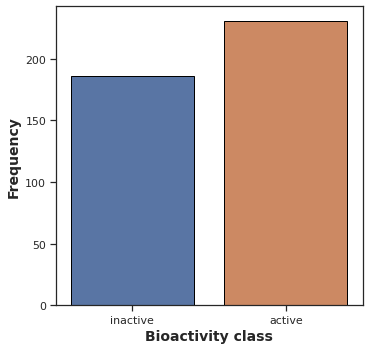

In [98]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Scatter plot of MW versus LogP**



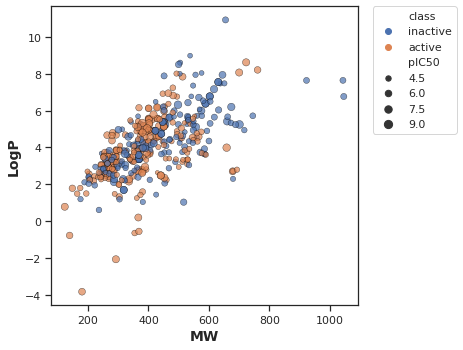

In [99]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

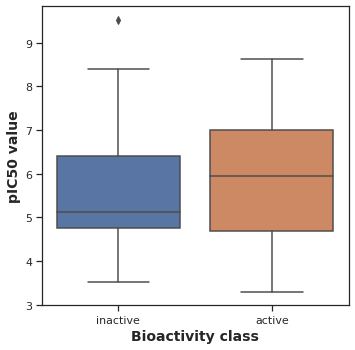

In [100]:
#Box Plots pIC50 Value
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')
     


# **Statistical analysis | Mann-Whitney U Test**

In [102]:
def mannwhitney(descriptor, verbose=False):
    # import necessary libraries
    from scipy.stats import mannwhitneyu

    # actives and inactives
    active = df_2class.loc[df_2class['class'] == 'active', descriptor]
    inactive = df_2class.loc[df_2class['class'] == 'inactive', descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])

    # save results to a file
    filename = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(filename, index=False)

    # print results if verbose is True
    if verbose:
        print(f'Descriptor: {descriptor}')
        print(f'Statistics: {stat:.3f}')
        print(f'p-value: {p:.3f}')
        print(f'alpha: {alpha}')
        print(f'Interpretation: {interpretation}')

    return results



mannwhitney('pIC50')


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,24455.0,0.015134,0.05,Different distribution (reject H0)


# **Molecular Weight**



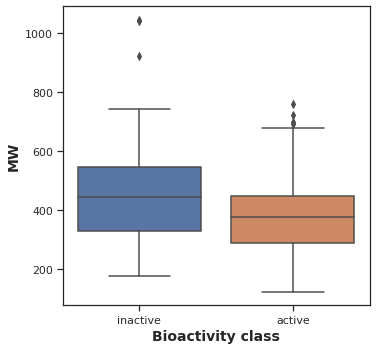

In [103]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [104]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,15919.0,0.000005,0.05,Different distribution (reject H0)


# **Log P**

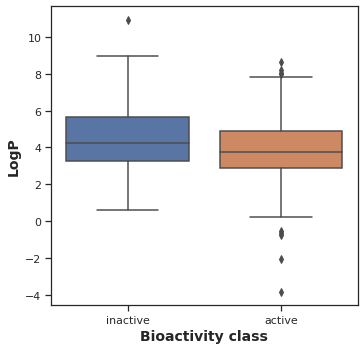

In [105]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [106]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,17604.5,0.001525,0.05,Different distribution (reject H0)


# **NumHDonors**

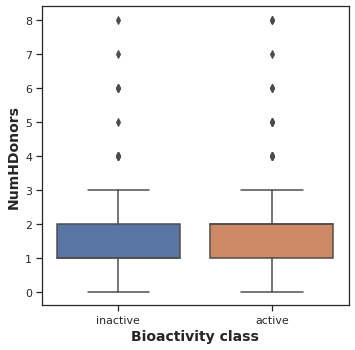

In [107]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')
     

In [108]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,22828.5,0.252045,0.05,Same distribution (fail to reject H0)


# **Num H Acceptors**

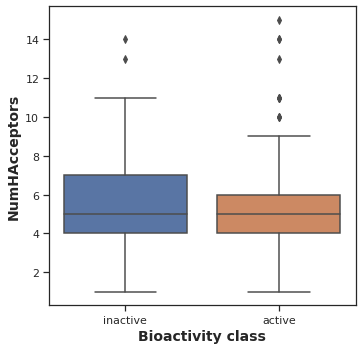

In [109]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [110]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,17887.0,0.00271,0.05,Different distribution (reject H0)


**Interpretation of Statistical Results**

**Box Plots**


**pIC50 values** 



Taking a look at pIC50 values, the actives and inactives displayed ***statistically significant difference***, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.


**Lipinski's descriptors**

Only 3 of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the actives and inactives. Number of Hydrogen Donors did not exhibit a statistically significant difference between the actives and inactives. Therefore it will not be used for developing a predictive model.

In [111]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: AB_A4_raw.csv (deflated 82%)
  adding: Amyloid_Beta_A4_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 7%)
  adding: plot_MW.pdf (deflated 40%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
